# Code for Big Data Analysis project

### Dimitrios Chatzakis
Biomedical engineering


### importing libraries

In [24]:
import pandas as pd
import numpy as np
from IPython.display import display
pd.set_option('display.max_columns', 55)
pd.set_option('display.max_rows', 540)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import ProgbarLogger
import keras.utils.np_utils as ku
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import preprocessing
from keras import regularizers
import keras
import keras.models as models
import keras.layers as layers
from keras.layers import Dropout, LeakyReLU
from keras import regularizers
from keras.layers.normalization import BatchNormalization

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import silhouette_samples, silhouette_score

print(tf.__version__)

2.1.0


## preprocessing of clinical dataset

In [25]:
#reading dataframe
clinical_d=pd.read_csv("clinical_dataset.csv", sep=';')

#creating dataframe
df1=pd.DataFrame(clinical_d)

#preprocessing - converting nominal to numerical values
df1['fried'] = df1['fried'].map({'Frail': 2, 'Pre-frail': 1, 'Non frail':0})
df1['gender'] = df1['gender'].map({'F': 0, 'M': 1})
df1['ortho_hypotension'] = df1['ortho_hypotension'].map({'No': 0, 'Yes': 1})
df1['vision'] = df1['vision'].map({'Sees poorly': 0, 'Sees moderately': 1, 'Sees well': 2})
df1['audition'] = df1['audition'].map({'Hears poorly': 0, 'Hears moderately': 1, 'Hears well': 2})
df1['weight_loss'] = df1['weight_loss'].map({'No': 0, 'Yes': 1})
df1['balance_single'] = df1['balance_single'].map({'<5 sec': 0, '>5 sec': 1})
df1['gait_optional_binary'] = df1['gait_optional_binary'].map({False: 0,True: 1})
df1['gait_speed_slower'] = df1['gait_speed_slower'].map({'No': 0,'Yes': 1})
df1['grip_strength_abnormal'] = df1['grip_strength_abnormal'].map({'No': 0,'Yes': 1})
df1['low_physical_activity'] = df1['low_physical_activity'].map({'No': 0,'Yes': 1})
df1['memory_complain'] = df1['memory_complain'].map({'No': 0,'Yes': 1})
df1['sleep'] = df1['sleep'].map({'No sleep problem': 0,'Occasional sleep problem': 1,
                                 'Permanent sleep problem':2})
df1['living_alone'] = df1['living_alone'].map({'No': 0,'Yes': 1})
df1['leisure_club'] = df1['leisure_club'].map({'No': 0,'Yes': 1})
df1['house_suitable_participant'] = df1['house_suitable_participant'].map({'No': 0,'Yes': 1})
df1['house_suitable_professional'] = df1['house_suitable_professional'].map({'No': 0,'Yes': 1})
df1['health_rate'] = df1['health_rate'].map({'1 - Very bad': 1,'2 - Bad': 2,
                                               '3 - Medium': 3,'4 - Good': 4,'5 - Excellent': 5,})
df1['health_rate_comparison'] = df1['health_rate_comparison'].map({'1 - A lot worse': 1,'2 - A little worse': 2,
                                               '3 - About the same': 3,'4 - A little better': 4,'5 - A lot better': 5,})
df1['activity_regular'] = df1['activity_regular'].map({'< 2 h per week': 0,
                                                       '> 2 h and < 5 h per week': 1, '> 5 h per week':2 })
df1['smoking'] = df1['smoking'].map({'Never smoked': 0,'Past smoker (stopped at least 6 months)': 1,
                                     'Current smoker':2 })


#preprocessing - removing or substituting missing values
df1['raise_chair_time'] = df1['raise_chair_time'].replace(999, np.nan, regex=True)
df1['gait_get_up'] = df1['gait_get_up'].replace(999, np.nan, regex=True)
df1['falls_one_year'] = df1['falls_one_year'].replace(999, np.nan, regex=True)
df1['fractures_three_years'] = df1['fractures_three_years'].replace(999, np.nan, regex=True)
df1.loc[537, 'bmi_score'] = np.nan
df1['bmi_body_fat'] = df1['bmi_body_fat'].replace(999, np.nan, regex=True)
df1.loc[490, 'lean_body_mass'] = np.nan
df1['social_calls'] = df1['social_calls'].replace(999, np.nan, regex=True)
df1['social_phone'] = df1['social_phone'].replace(999, np.nan, regex=True)
df1['social_skype'] = df1['social_skype'].replace(999, np.nan, regex=True)
df1['social_text'] = df1['social_text'].replace(999, np.nan, regex=True)
df1['alcohol_units'] = df1['alcohol_units'].replace(999, np.nan, regex=True)

df1=df1.replace({np.nan:'missing'})
df1=df1.replace({'nan':'missing'})
df1 = df1.replace(to_replace='missing', value=np.nan)

# droping rows with multiple missing values (more than 1)
df1=df1.dropna(axis=0,thresh=54)

#substituting with mean when we have missing values
df1['raise_chair_time'] = df1['raise_chair_time'].replace(np.nan, df1.raise_chair_time.mean())
df1['gait_get_up'] = df1['gait_get_up'].replace(np.nan, df1.gait_get_up.mean())
df1['fractures_three_years'] = df1['fractures_three_years'].replace(np.nan, df1.fractures_three_years.mean())
df1['bmi_score']=df1['bmi_score'].astype(float)
df1['bmi_score'] = df1['bmi_score'].replace(np.nan, df1.bmi_score.mean())
df1['bmi_body_fat'] = df1['bmi_body_fat'].replace(np.nan, df1.bmi_body_fat.mean())
df1['waist'] = df1['waist'].replace(np.nan, df1.waist.mean())
df1['lean_body_mass']=df1['lean_body_mass'].astype(float)
df1['lean_body_mass'] = df1['lean_body_mass'].replace(np.nan, df1.lean_body_mass.mean())
df1['cognitive_total_score'] = df1['cognitive_total_score'].replace(np.nan, df1.cognitive_total_score.mean())
df1['social_visits'] = df1['social_visits'].replace(np.nan, df1.social_visits.mean())
df1['social_skype'] = df1['social_skype'].replace(np.nan, df1.social_visits.mean())
df1['social_text'] = df1['social_text'].replace(np.nan, df1.social_text.mean())
df1['weight_loss'] = df1['weight_loss'].replace(np.nan, df1.weight_loss.mean())
df1['falls_one_year'] = df1['falls_one_year'].replace(np.nan, df1.falls_one_year.mean())
df1['activity_regular'] = df1['activity_regular'].replace(np.nan, df1.activity_regular.mean())
df1['sleep'] = df1['sleep'].replace(np.nan, df1.sleep.mean())
df1['social_phone'] = df1['social_phone'].replace(np.nan, df1.social_phone.mean())
df1['house_suitable_participant'] = df1['house_suitable_participant'].replace(np.nan, df1.house_suitable_participant.mean())
df1['house_suitable_professional'] = df1['house_suitable_professional'].replace(np.nan, df1.house_suitable_professional.mean())
df1['balance_single'] = df1['balance_single'].replace(np.nan, df1.balance_single.mean())
df1['gait_speed_slower'] = df1['gait_speed_slower'].replace(np.nan, df1.gait_speed_slower.mean())
df1['stairs_number'] = df1['stairs_number'].replace(np.nan, df1.stairs_number.mean())
df1['memory_complain'] = df1['memory_complain'].replace(np.nan, df1.memory_complain.mean())
df1['alcohol_units'] = df1['alcohol_units'].replace(np.nan, df1.alcohol_units.mean())


#normalize dataset for neural net.
df3=(df1-df1.mean())/df1.std()
#print(df3.mean(axis=0))

#print(df1.columns)
df3['fried']=100*df3['fried']
print(df3['fried'])

0      -86.458036
1       69.962753
2       69.962753
3      226.383542
4       69.962753
5      -86.458036
6      -86.458036
8       69.962753
10     226.383542
11     -86.458036
12      69.962753
13      69.962753
14     -86.458036
15     226.383542
16      69.962753
21     -86.458036
22     226.383542
25      69.962753
26      69.962753
29      69.962753
32     -86.458036
34     -86.458036
35      69.962753
37      69.962753
38      69.962753
40      69.962753
41     -86.458036
42      69.962753
43     -86.458036
44     -86.458036
45      69.962753
46      69.962753
47     -86.458036
48     -86.458036
49     -86.458036
50      69.962753
51      69.962753
52     -86.458036
53     226.383542
54      69.962753
56      69.962753
57      69.962753
58      69.962753
59     -86.458036
60     -86.458036
65     -86.458036
67     -86.458036
68     226.383542
79      69.962753
80      69.962753
82     -86.458036
83      69.962753
84     -86.458036
85     -86.458036
86      69.962753
87     226

# classifications

In [26]:
#split into test and training test
dfs=np.split(df1, [200],axis=0)
training_data=dfs[0]
test_data=dfs[1]

# dropping the required columns
training_data=training_data.drop(['part_id','weight_loss','exhaustion_score',
                                 'gait_speed_slower','grip_strength_abnormal','low_physical_activity'],axis=1)
test_data=test_data.drop(['part_id','weight_loss','exhaustion_score',
                                 'gait_speed_slower','grip_strength_abnormal','low_physical_activity'],axis=1)

## classification 1 Neural Network

In [27]:
#splitting to test and train sets
y_val, x_val, y_train, x_train = test_data.drop(['gender', 'age', 'hospitalization_one_year',
       'hospitalization_three_years', 'ortho_hypotension', 'vision',
       'audition',  'raise_chair_time',
       'balance_single', 'gait_get_up', 'gait_speed_4m',
       'gait_optional_binary',  'falls_one_year', 'fractures_three_years',
       'bmi_score', 'bmi_body_fat', 'waist', 'lean_body_mass',
       'screening_score', 'cognitive_total_score', 'memory_complain', 'sleep',
       'mmse_total_score', 'depression_total_score', 'anxiety_perception',
       'living_alone', 'leisure_out', 'leisure_club', 'social_visits',
       'social_calls', 'social_phone', 'social_skype', 'social_text',
       'house_suitable_participant', 'house_suitable_professional',
       'stairs_number', 'life_quality', 'health_rate',
       'health_rate_comparison', 'pain_perception', 'activity_regular',
       'smoking', 'alcohol_units', 'katz_index', 'iadl_grade',
       'comorbidities_count', 'comorbidities_significant_count',
       'medication_count'],axis=1).to_numpy().astype(np.float32),test_data.drop(['fried'],axis=1).to_numpy().astype(np.float32),training_data.drop([ 'gender', 'age', 'hospitalization_one_year',
       'hospitalization_three_years', 'ortho_hypotension', 'vision',
       'audition', 'raise_chair_time',
       'balance_single', 'gait_get_up', 'gait_speed_4m',
       'gait_optional_binary','falls_one_year', 'fractures_three_years',
       'bmi_score', 'bmi_body_fat', 'waist', 'lean_body_mass',
       'screening_score', 'cognitive_total_score', 'memory_complain', 'sleep',
       'mmse_total_score', 'depression_total_score', 'anxiety_perception',
       'living_alone', 'leisure_out', 'leisure_club', 'social_visits',
       'social_calls', 'social_phone', 'social_skype', 'social_text',
       'house_suitable_participant', 'house_suitable_professional',
       'stairs_number', 'life_quality', 'health_rate',
       'health_rate_comparison', 'pain_perception', 'activity_regular',
       'smoking', 'alcohol_units', 'katz_index', 'iadl_grade',
       'comorbidities_count', 'comorbidities_significant_count',
       'medication_count'],axis=1).to_numpy().astype(np.float32),training_data.drop(['fried'],axis=1).to_numpy().astype(np.float32)



x=np.split(x_val,[15],axis=0)
x_val=x[0]
x_test=x[1]

y=np.split(y_val,[15],axis=0)
y_val=y[0]
y_test=y[1]

#print(y_val)

y_val=ku.to_categorical(y_val)
y_test=ku.to_categorical(y_test)
y_train=ku.to_categorical(y_train)
print(y_test)
#print(y_val)

print(y_test.shape)

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]
(60, 3)


In [28]:
#building model
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(180, activation = "relu",kernel_regularizer=regularizers.l2(2.0)))
    model.add(BatchNormalization(momentum = 0.99))
    model.add(Dropout(0.1))
    model.add(layers.Dense(50, activation = "relu"))
    model.add(BatchNormalization(momentum = 0.99))
    model.add(Dropout(0.1))
    model.add(layers.Dense(100, activation = "relu"))
    model.add(BatchNormalization(momentum = 0.99))
    model.add(Dropout(0.1))
    model.add(layers.Dense(3, activation = "softmax"))
    
    model.compile(
        optimizer='adam',
        loss=['categorical_crossentropy'],
        metrics=['accuracy']
    )
    return model


model = build_model()


#train model and output
history = model.fit(
    x_train,
    y_train,
    epochs=100,
    validation_data=(
        x_val,
        y_val
    ),
    callbacks=[keras.callbacks.EarlyStopping(
        monitor = 'val_loss',
        patience = 5),
        ProgbarLogger(count_mode='samples',stateful_metrics=None)
    ]
)

Train on 200 samples, validate on 15 samples
Epoch 1/100
Epoch 1/100
200/200 [==============================] - 1s 6ms/sample - loss: 144.4592 - accuracy: 0.3295 - val_loss: 133.7211 - val_accuracy: 0.5333
Epoch 2/100
Epoch 2/100
200/200 [==============================] - 0s 138us/sample - loss: 126.7106 - accuracy: 0.4854 - val_loss: 116.8675 - val_accuracy: 0.4667
Epoch 3/100
Epoch 3/100
200/200 [==============================] - 0s 143us/sample - loss: 110.7334 - accuracy: 0.5503 - val_loss: 101.9153 - val_accuracy: 0.4667
Epoch 4/100
Epoch 4/100
200/200 [==============================] - 0s 165us/sample - loss: 96.5278 - accuracy: 0.5151 - val_loss: 88.7255 - val_accuracy: 0.4667
Epoch 5/100
Epoch 5/100
200/200 [==============================] - 0s 392us/sample - loss: 83.8961 - accuracy: 0.5739 - val_loss: 76.9874 - val_accuracy: 0.4667
Epoch 6/100
Epoch 6/100
200/200 [==============================] - 0s 251us/sample - loss: 72.7571 - accuracy: 0.5541 - val_loss: 66.6920 - val_ac

200/200 [==============================] - 0s 220us/sample - loss: 3.0804 - accuracy: 0.5916 - val_loss: 3.4884 - val_accuracy: 0.3333
Epoch 29/100
Epoch 29/100
200/200 [==============================] - 0s 560us/sample - loss: 2.7556 - accuracy: 0.6290 - val_loss: 3.1636 - val_accuracy: 0.4000
Epoch 30/100
Epoch 30/100
200/200 [==============================] - 0s 244us/sample - loss: 2.5628 - accuracy: 0.6409 - val_loss: 2.7623 - val_accuracy: 0.3333
Epoch 31/100
Epoch 31/100
200/200 [==============================] - 0s 301us/sample - loss: 2.2772 - accuracy: 0.6661 - val_loss: 2.4932 - val_accuracy: 0.4667
Epoch 32/100
Epoch 32/100
200/200 [==============================] - 0s 190us/sample - loss: 2.2090 - accuracy: 0.6231 - val_loss: 2.3139 - val_accuracy: 0.4667
Epoch 33/100
Epoch 33/100
200/200 [==============================] - 0s 180us/sample - loss: 2.0056 - accuracy: 0.6577 - val_loss: 2.2092 - val_accuracy: 0.3333
Epoch 34/100
Epoch 34/100
200/200 [=========================

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 180)               8820      
_________________________________________________________________
batch_normalization_4 (Batch (None, 180)               720       
_________________________________________________________________
dropout_4 (Dropout)          (None, 180)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                9050      
_________________________________________________________________
batch_normalization_5 (Batch (None, 50)                200       
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)              

In [30]:
model.evaluate(x_test, y_test)

60/60 [==============================] - ETA:  - 0s 79us/step


[1.5765312910079956, 0.5833333134651184]

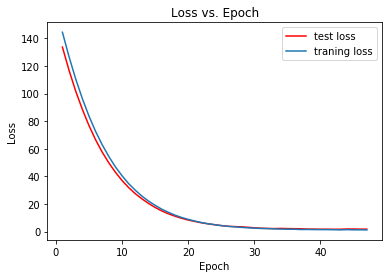

In [31]:
def plot_loss(history):
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    x = list(range(1, len(test_loss) + 1))
    plt.plot(x, test_loss, color = 'red', label = 'test loss')
    plt.plot(x, train_loss, label = 'traning loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs. Epoch')
    plt.legend()
    
plot_loss(history)

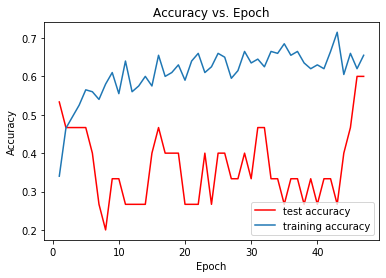

In [32]:
def plot_accuracy(history):
    train_acc = history.history['accuracy']
    test_acc = history.history['val_accuracy']
    x = list(range(1, len(test_acc) + 1))
    plt.plot(x, test_acc, color = 'red', label = 'test accuracy')
    plt.plot(x, train_acc, label = 'training accuracy')  
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epoch')  
    plt.legend(loc='lower right')
    
plot_accuracy(history)

# seems to be a problem beacuse each time I get a new weird output no matter the learning rate or number of neurons I tampered with.

## classification 2 - Bayesian classification

In [10]:
#split into train and test set
rest=df1.drop(['part_id','fried', 'weight_loss','exhaustion_score',
                                 'gait_speed_slower','grip_strength_abnormal','low_physical_activity'],axis=1).to_numpy().astype(np.float32)
fried=df1.drop(['part_id','gender', 'age', 'hospitalization_one_year',
       'hospitalization_three_years', 'ortho_hypotension', 'vision',
       'audition', 'weight_loss', 'exhaustion_score', 'raise_chair_time',
       'balance_single', 'gait_get_up', 'gait_speed_4m',
       'gait_optional_binary', 'gait_speed_slower', 'grip_strength_abnormal',
       'low_physical_activity', 'falls_one_year', 'fractures_three_years',
       'bmi_score', 'bmi_body_fat', 'waist', 'lean_body_mass',
       'screening_score', 'cognitive_total_score', 'memory_complain', 'sleep',
       'mmse_total_score', 'depression_total_score', 'anxiety_perception',
       'living_alone', 'leisure_out', 'leisure_club', 'social_visits',
       'social_calls', 'social_phone', 'social_skype', 'social_text',
       'house_suitable_participant', 'house_suitable_professional',
       'stairs_number', 'life_quality', 'health_rate',
       'health_rate_comparison', 'pain_perception', 'activity_regular',
       'smoking', 'alcohol_units', 'katz_index', 'iadl_grade',
       'comorbidities_count', 'comorbidities_significant_count',
       'medication_count'],axis=1).to_numpy().astype(np.float32)

In [11]:
#Bayes Method
summ=0
for i in range(20):
    X_train, X_test, Y_train, Y_test = train_test_split( rest, fried, test_size=0.2)
    gnb = GaussianNB()
    gnb.fit(X_train, np.ravel(Y_train))
    Y_pred = gnb.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
    summ+=metrics.accuracy_score(Y_test, Y_pred)
print(summ/20)

Accuracy: 0.6
Accuracy: 0.6181818181818182
Accuracy: 0.6363636363636364
Accuracy: 0.5454545454545454
Accuracy: 0.6181818181818182
Accuracy: 0.6727272727272727
Accuracy: 0.6909090909090909
Accuracy: 0.5818181818181818
Accuracy: 0.6727272727272727
Accuracy: 0.6
Accuracy: 0.6
Accuracy: 0.7272727272727273
Accuracy: 0.5454545454545454
Accuracy: 0.6727272727272727
Accuracy: 0.7090909090909091
Accuracy: 0.7636363636363637
Accuracy: 0.509090909090909
Accuracy: 0.5636363636363636
Accuracy: 0.6363636363636364
Accuracy: 0.4727272727272727
0.6218181818181818


## preprocessing of beacons dataset

In [12]:
#reading dataframe
beacons_d=pd.read_csv("beacons_dataset.csv", sep=';')
df2=pd.DataFrame(beacons_d)

#substituting wrong to right values
df2['room']=df2['room'].replace({'Barhroom':'Bathroom','Livroom':'Livingroom','Kitcheb':'Kitchen','Kitch':'Kitchen',
                     'Bed':'Bedroom','Living':'Livingroom', 'Bathroon':'Bathroom','Livingroom2':'Livingroom',
                    'Livingroom1':'Livingroom','Sitingroom':'Livingroom','Kitcen':'Kitchen','Leavingroom':'Livingroom',
                    'Sittingroom':'Livingroom','LivingRoom':'Livingroom','Sittigroom':'Livingroom','Luvingroom1':'Livingroom',
                    'SittingRoom':'Livingroom','LeavingRoom':'Livingroom','DinerRoom':'Diningroom','Washroom':'Bathroom',
                    'DiningRoom':'Diningroom','Baghroom':'Bathroom','SeatingRoom':'Livingroom','LuvingRoom':'Livingroom',
                    'Bedroom2':'Bedroom','Bedroom1':'Bedroom','LivingRoom2':'Livingroom','DinnerRoom':'Diningroom',
                    'Kithen':'Kitchen','Kitchen2':'Kitchen','Kitvhen':'Kitchen','Liningroom':'Livingroom','SittingOver':'Livingroom',
                    'DinningRoom':'Diningroom','Bsthroom':'Bathroom','Bathroim':'Bathroom','Livingroon':'Livingroom',
                    'livingroom':'Livingroom','bedroom':'Bedroom','kitchen':'Kitchen','Bqthroom':'Bathroom',
                    'Sittinroom':'Livingroom','Kichen':'Kitchen','Kiychen':'Kitchen','Bedroom1st':'Bedroom',
                    'Bedroom-1':'Bedroom','Bathroom-1':'Bathroom','LivibgRoom':'Livingroom','Leavivinroom':'Livingroom',
                    'Bathroom1':'Bathroom','Chambre':'Bedroom'})

#replacing weird values to np.nan
df2['part_id']=df2['part_id'].replace({'New': np.nan,'Newp': np.nan,'Test':np.nan,'Thom': np.nan,'Iti_': np.nan,
                                      'newt': np.nan,'newf': np.nan,'12_3': np.nan,'Tria': np.nan,'new': np.nan,
                                      'tria': np.nan,'Agla': np.nan,'Newt': np.nan,'Cert': np.nan,'test': np.nan,
                                      'cert': np.nan, '123.':np.nan})
#dropping missing values
df2=df2.dropna()
print(df2['part_id'].count())

46794


### creating the new dataset
#### iterating through dataset to gather the right information

In [13]:
#initialising lists and values 
ID=[]
Time_tot=[]
Time_kitch=[]
Time_bath=[]
Time_bed=[]
Time_liv=[]

time_tot=0.
time_kitch=0
time_bath=0
time_bed=0
time_liv=0

#algorithm for calculating the values needed for the new dataframe
for index in range(46793):
#if the two consecutive id are not the same, the total time is added and the respective time spent in the room
#is appended for the first index (if it is in the correct room of the 4) assuming the person of the initial index
#is in the room all day
    if df2.iloc[index,0]!=df2.iloc[index+1,0]:
        t1=df2.iloc[index,2].split(':')
        t1 = list(map(int, t1))
        T1=t1[0]*3600+t1[1]*60+t1[2]
        T2=24*3600
        time_tot+=T2-T1
        Time_tot.append(time_tot)
        time_tot=0
        if df2.iloc[index,3]=="Kitchen":
            time_kitch+=T2-T1
        elif df2.iloc[index,3]=="Bedroom":
            time_bed+=T2-T1
        elif df2.iloc[index,3]=="Bathroom":
            time_bath+=T2-T1
        elif df2.iloc[index,3]=="Livingroom":
            time_liv+=T2-T1
        Time_kitch.append(time_kitch)
        time_kitch=0
        Time_bath.append(time_bath)
        time_bath=0
        Time_bed.append(time_bed)
        time_bed=0
        Time_liv.append(time_liv)
        time_liv=0
        ID.append(df2.iloc[index,0])
#if the id's are the same
    elif df2.iloc[index,0]==df2.iloc[index+1,0]:
    #check if the day is the same
        if df2.iloc[index,1].astype(int)==df2.iloc[index+1,1].astype(int):
        #if it is the same we subtract times and add to the time_total and to the respective time_room 
            t1=df2.iloc[index,2].split(':')
            t1 = list(map(int, t1)) 
            T1=t1[0]*3600+t1[1]*60+t1[2]
            t2=df2.iloc[index+1,2].split(':')
            t2 = list(map(int, t2))
            T2=t2[0]*3600+t2[1]*60+t2[2]
            time_tot+=T2-T1
            if df2.iloc[index,3]=="Kitchen":
                time_kitch+=T2-T1
            elif df2.iloc[index,3]=="Bedroom":
                time_bed+=T2-T1
            elif df2.iloc[index,3]=="Bathroom":
                time_bath+=T2-T1
            elif df2.iloc[index,3]=="Livingroom":
                time_liv+=T2-T1
        elif df2.iloc[index,1].astype(int)!=df2.iloc[index+1,1].astype(int):
        #if the day is not the same we assume the person of the initial index is in the same room 
        #all day so we add times to time_tot and to the respective time_room assuming he is there till the end of
        #day
            t1=df2.iloc[index,2].split(':')
            t1 = list(map(int, t1))
            T1=t1[0]*3600+t1[1]*60+t1[2]
            T2=24*3600
            time_tot+=T2-T1
            if index==46793:
                t3=df2.iloc[index,2].split(':')
                t3=list(map(int, t3))
                time_tot+=24*3600-t3
                Time_tot.append(time_tot)
                time_tot=0
                if df2.iloc[index,3]=='Kitchen':
                    time_kitch+=T2-T1
                elif df2.iloc[index,3]=='Bedroom':
                    time_bed+=T2-T1
                elif df2.iloc[index,3]=='Bathroom':
                    time_bath+=T2-T1
                elif df2.iloc[index,3]=='Livingroom':
                    time_liv+=T2-T1
                Time_kitch.append(time_kitch)
                time_kitch=0
                Time_bath.append(time_bath)
                time_bath=0
                Time_bed.append(time_bed)
                time_bed=0
                Time_liv.append(time_liv)
                time_liv=0
                ID.append(df2.iloc[index,0])

In [14]:
# transforming ID to int cause of error message
ID = list(map(int, ID))

#initialize a count list
count=[]

#creating the values for the new dataset
#we check for the same ID's and then increase the Time_list's respective value
for i in range(len(ID)-1):
    for n in range(i+1,len(ID)):
        if ID[i]!=ID[n]:
            continue
        else:
            Time_tot[i]+=Time_tot[n]
            Time_kitch[i]+=Time_kitch[n]
            Time_bed[i]+=Time_bed[n]
            Time_liv[i]+=Time_liv[n]
            Time_bath[i]+=Time_bath[n]
            count.append(n)

#keeping only unique values and not duplicates            
count=set(count)
count=list(count)

#creating the arrays for the new dataset
for i in range(len(count)):
    ID.pop(count[len(count)-i-1])
    Time_tot.pop(count[len(count)-i-1])
    Time_kitch.pop(count[len(count)-i-1])
    Time_bed.pop(count[len(count)-i-1])
    Time_bath.pop(count[len(count)-i-1])
    Time_liv.pop(count[len(count)-i-1])

In [15]:
#transforming to string cause of errors
ID = list(map(str, ID))

#for verification
print(len(ID))
print(len(Time_tot))
print(len(Time_kitch))
print(len(Time_bath))
print(len(Time_bed))
print(len(Time_liv))

291
291
291
291
291
291


In [16]:
#transforming to np.arrays so as to be able to convert to dataframe object
ID=np.array(ID)
Time_tot=np.array(Time_tot)
Time_kitch=np.array(Time_kitch)
Time_bed=np.array(Time_bed)
Time_liv=np.array(Time_liv)
Time_bath=np.array(Time_bath)

#final form of lists
for i in range(len(ID)):
    Time_kitch[i]=Time_kitch[i]/Time_tot[i]*100
    Time_bed[i]=Time_bed[i]/Time_tot[i]*100
    Time_bath[i]=Time_bath[i]/Time_tot[i]*100
    Time_liv[i]=Time_liv[i]/Time_tot[i]*100

In [17]:
#creating new dataframe 
data = np.array([ID, Time_kitch, Time_bed, Time_bath, Time_liv ])
df_new = pd.DataFrame({'part_id': data[0,:], 'Kitchen': data[1,:],'Bedroom': data[2,:],'Bathroom': data[3,:],'Livingroom': data[4,:]})
print(df_new)

    part_id Kitchen Bedroom Bathroom Livingroom
0      3089      31       0        0         11
1      1035      10       0        0         16
2      2113      27       0        2         32
3      1003      12       0       33         19
4      2108      34       1        0          6
5      2100      17       8       14          2
6      2094      17       1       25          5
7      2109      24       6       11         14
8      2101      28       1        0         11
9      3106       2       0        1         17
10     3112       0      50        1          0
11     2081      14       4       10         39
12     3601       7       0        0          8
13     3087       6       0        0         25
14     2116       0      21        0         39
15     2615      21       0        0         27
16     2082       6       9        0         34
17     2092      23       0        0         15
18     3104      12      11        0          9
19     3120       1      12        0    

### new merged dataset

In [18]:
df1['part_id']= list(map(str, df1['part_id']))

#merging
Mergory=pd.merge(df1,
                 df_new[['part_id', 'Kitchen', 'Bathroom','Bedroom','Livingroom']],
                 on='part_id')

#dropping useless column
Mergory=Mergory.drop(['part_id'],axis=1)

## Clustering

### applying pca

In [19]:
Mergory=Mergory.astype(np.float32)

#normalising data
scaler = StandardScaler()
scaler.fit(Mergory)
Mergory = scaler.transform(Mergory)

#PCA 
#this automatically finds the optimum number of principal components
pca = PCA(n_components = 'mle') 

pca.fit(Mergory)
Mergory = pca.transform(Mergory)

#Mergory back to DataFrame
Mergory=pd.DataFrame(data=Mergory)

#principal components
print(Mergory.columns)

RangeIndex(start=0, stop=13, step=1)


### Mean-Shift Clustering Method

0.19765776
[0 0 5 0 0 0 2 0 0 0 0 0 0 1 0 0 0 4 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2
 0 0 0 0 0 0 0 0 0 0 8 0 0 6 0 0 0 0 7 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 9 0 0 6 0 0 2 0 0 0 0 8 0 8 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


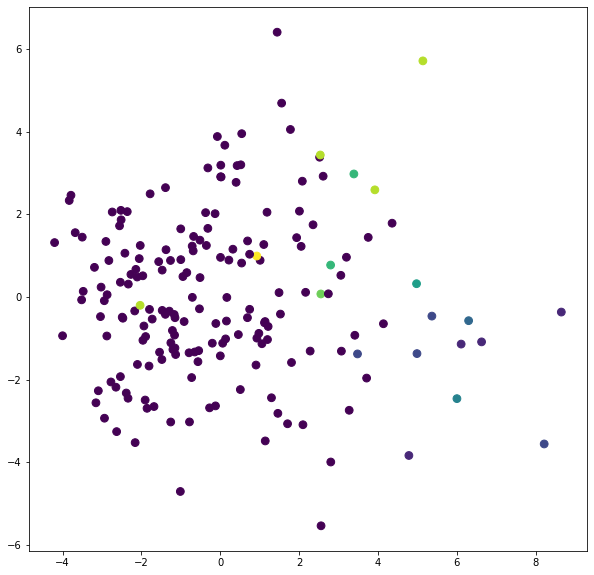

In [20]:
#Mean-Shift Clustering Method
ms = MeanShift()
NEW=ms.fit(Mergory)


#plots - tampering with array index shows mother perspectives of clustering
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(Mergory[0], Mergory[1],c=NEW.labels_, marker='o',s=60)

#silhouette coefficient
silhouette_avg = silhouette_score(Mergory, NEW.labels_)


print(silhouette_avg)
print(NEW.labels_)

3d projection of Mean Shift

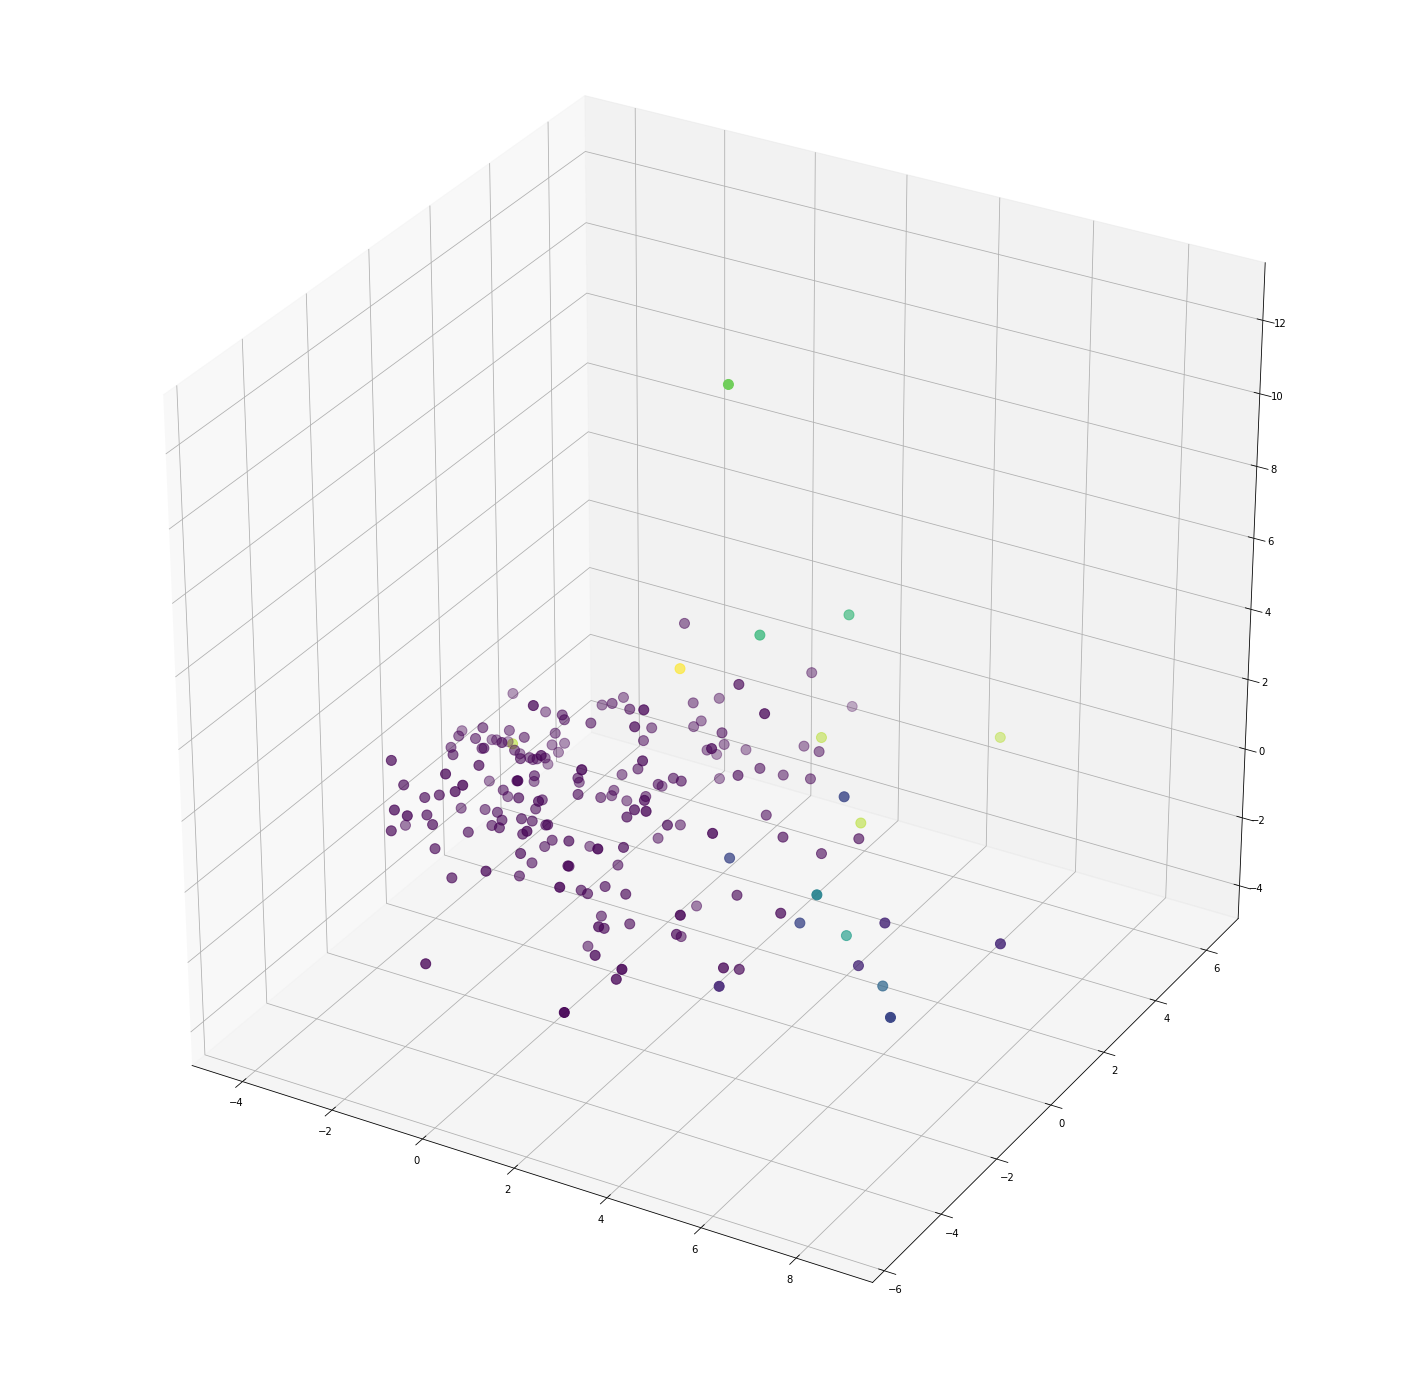

In [21]:
#plots - tampering with array index shows mother perspectives of clustering
fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Mergory[0], Mergory[1], Mergory[2],c=NEW.labels_, marker='o',s=100)
plt.show()

### clustering algorithm - K means

0.18283097
0.17168587
0.07754893
0.073158585
0.089510545
0.08210955
0.079970114
0.08653516
0.09040774
0.084435344
0.08409809
0.09146933
0.09603536
[1 0 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0
 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0
 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1
 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1
 1 1]


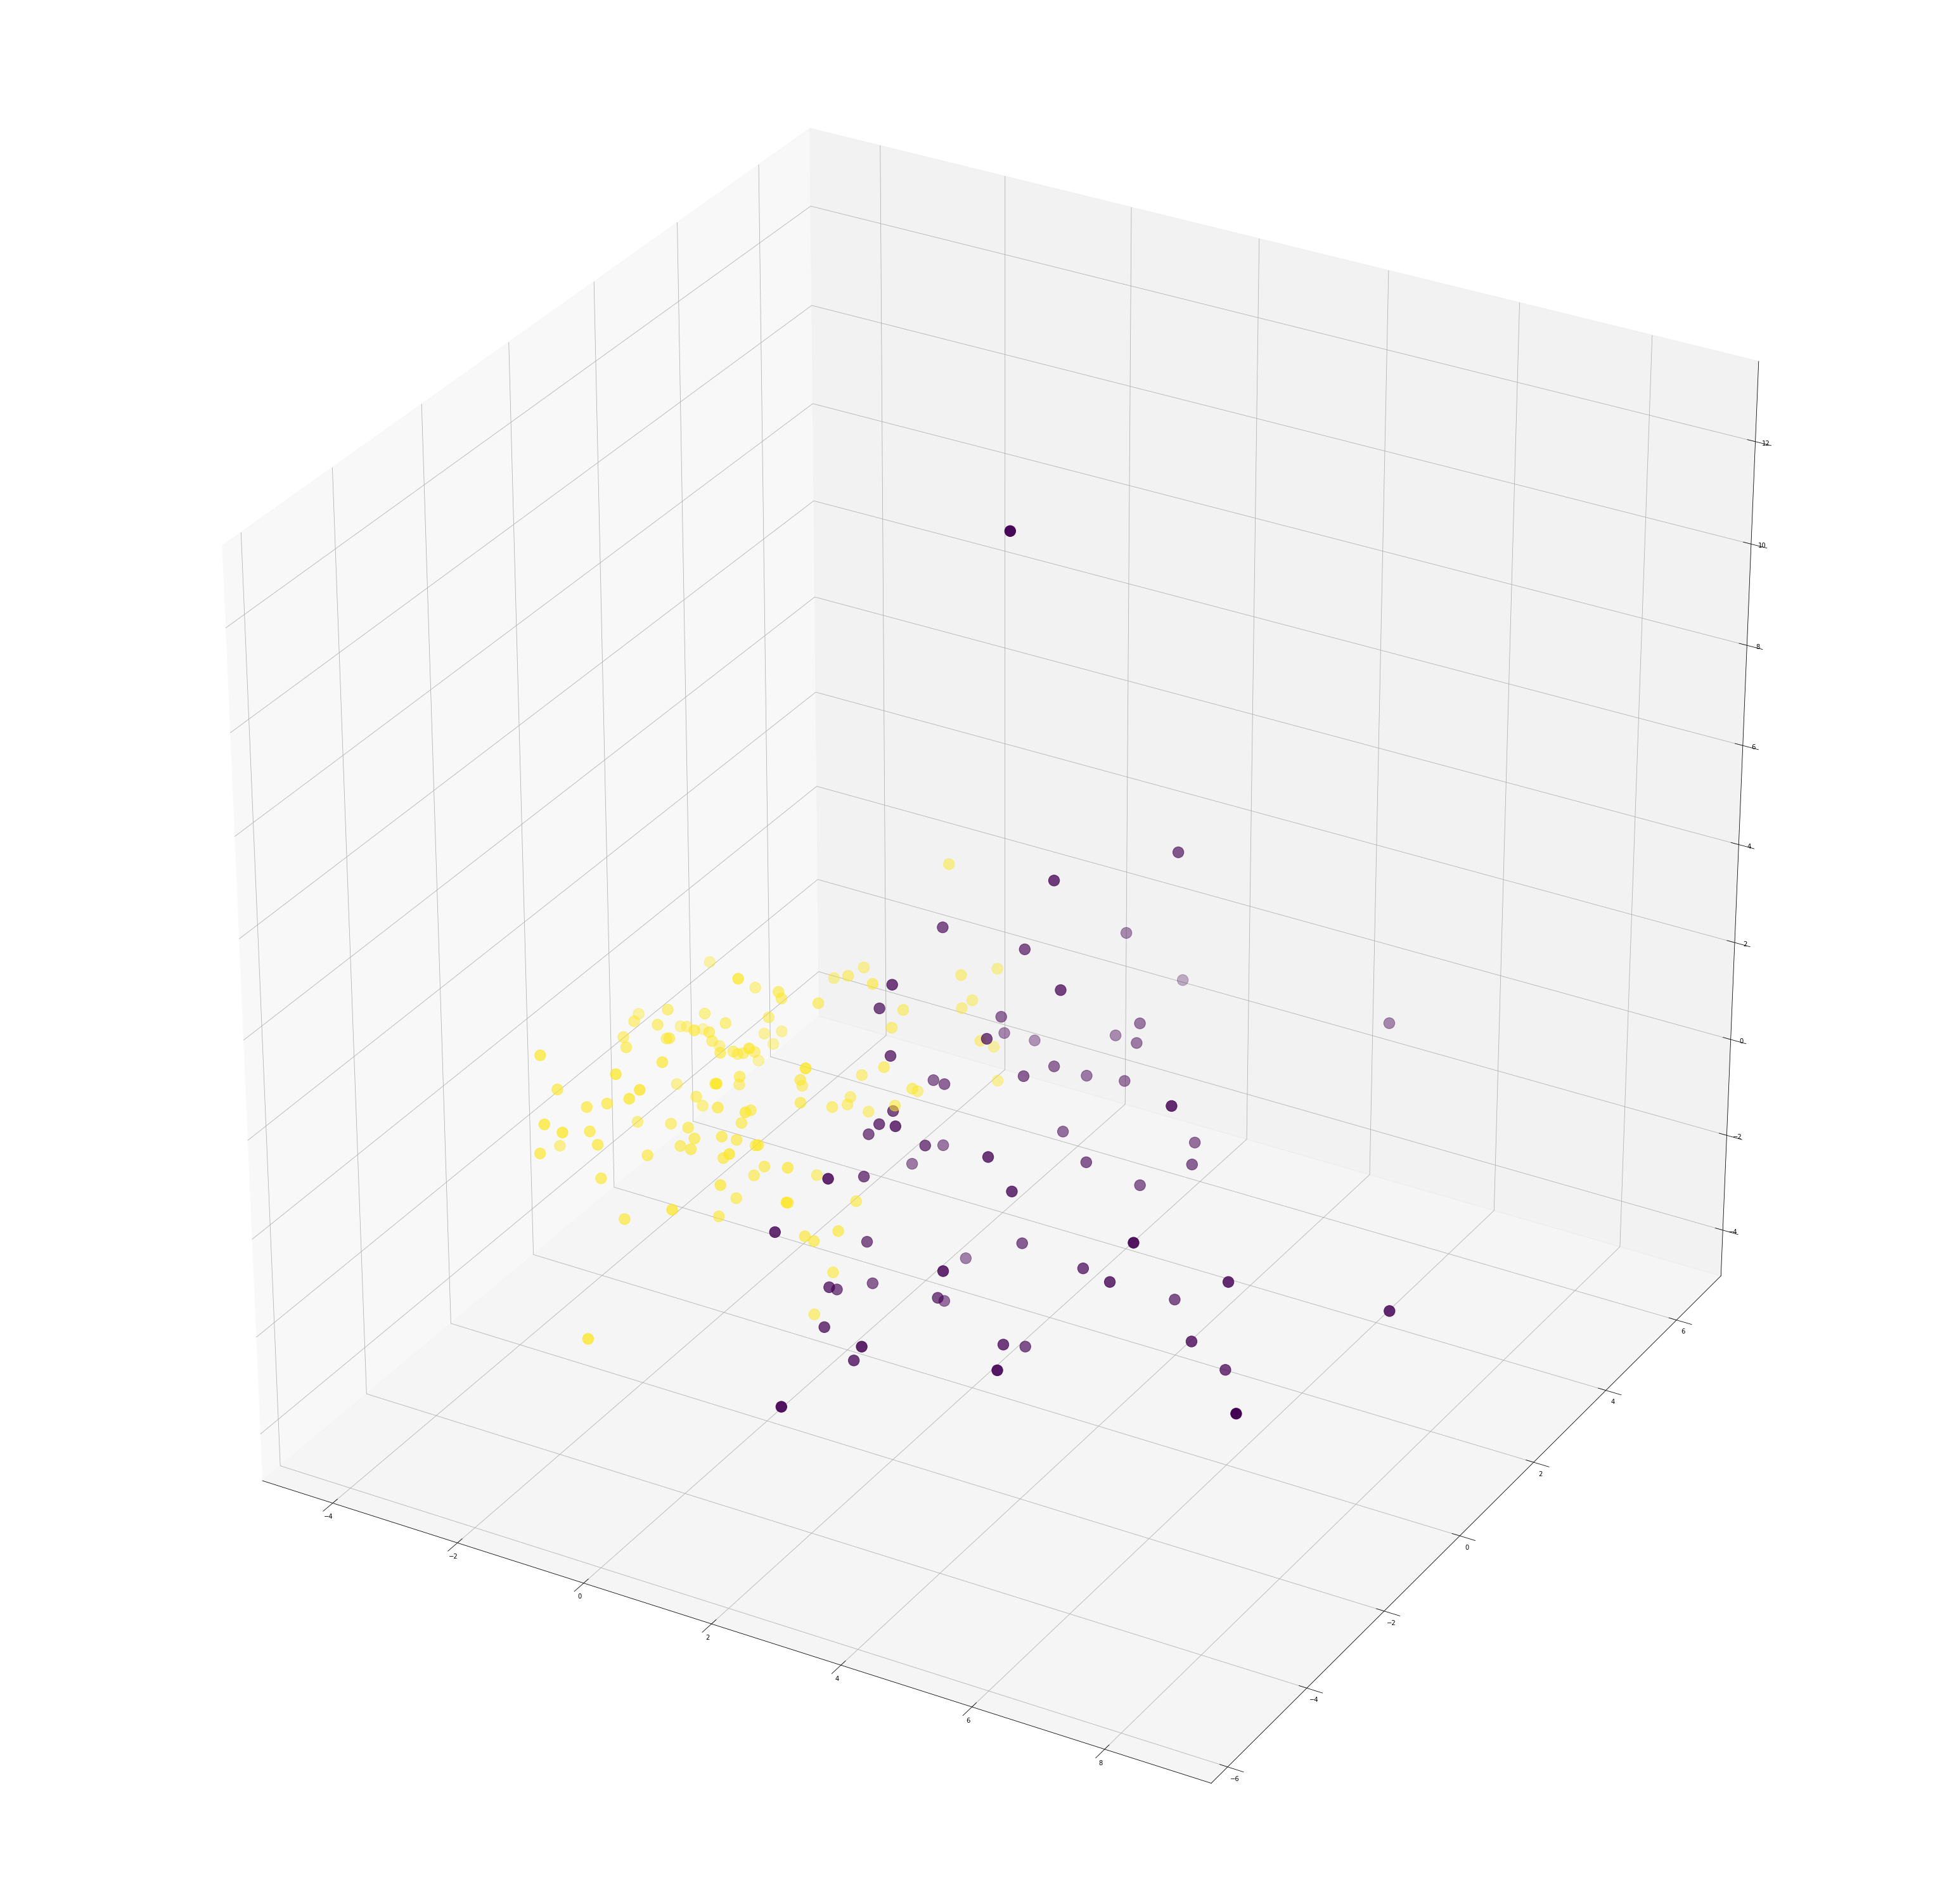

In [22]:
from sklearn.cluster import KMeans

for n in range(2,15):
    #applying k-means
    kmeans = KMeans(n_clusters=n,random_state=100)
    kmeans.fit(Mergory)
    labels = kmeans.predict(Mergory)

    silhouette_avg = silhouette_score(Mergory, labels) 
    print(silhouette_avg)

#k=2 is the best result so we keep that one
kmeans = KMeans(n_clusters=2,random_state=10)
kmeans.fit(Mergory)
labels = kmeans.predict(Mergory)

silhouette_avg = silhouette_score(Mergory, labels) 
print(labels)

#plots - tampering with array index shows mother perspectives of clustering
fig = plt.figure(figsize=(55, 55))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Mergory[0], Mergory[1], Mergory[2],c=labels, marker='o',s=300)
plt.show()

2d visualization of k-means

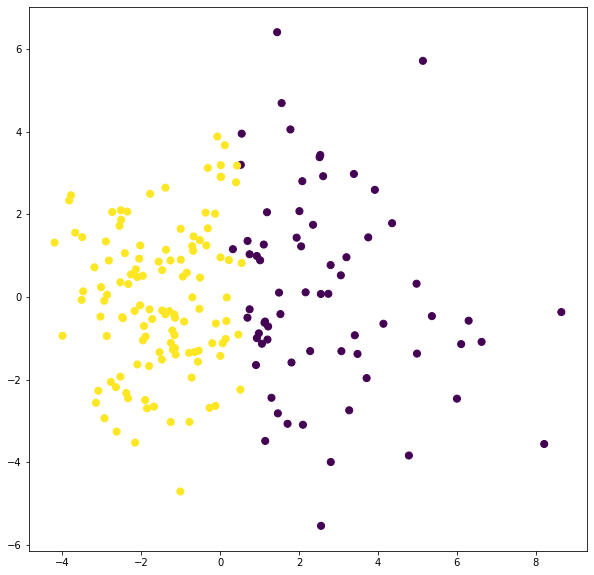

In [23]:
#plots - tampering with array index shows mother perspectives of clustering
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(Mergory[0], Mergory[1],c=labels, marker='o',s=50)
plt.show()